# `data_KPiPi_constr`
# Fit of `B0_M` of the recontructed $B^0 \to D^*K \pi^+\pi^-$ decay
- **Model**: sum of
    - A crystal ball with left powertail
    - A crystal ball with right powertail
- **Data** : `RapidSim` simulated of $B^0 \to D^*K \pi^+\pi^-$ with $K$ misidentified as a $\pi$ of same charge, **with constrained $m(D^*)$**

## Libraries

In [22]:
import zfit
import pandas as pd
from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets


import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_data, add_constr_Dst, json_to_latex_table, retrieve_params
import plot.histogram as h
from plot.fit import plot_hist_fit_particle
from fit import launch_fit, save_params
import plot.tool as pt
from variables import name_params_KPiPi

## Retrieve data

In [2]:
variables = ['B0_M_Tau_Pi12pip', 'Dst_M', 'D0_M']
df = load_data(years, magnets, type_data='data_KPiPi', vars=variables)
for var in variables: # GeV --> MeV
    df[var] = 1000*df[var]

/afs/cern.ch/user/d/dhill/public/forAnthony/Bd2DstKPiPi.root


In [3]:
name_data = 'data_KPiPi_constr'
var = 'B0_M_Tau_Pi12pip'
var_constr = 'Dst_constr_B0_M_Tau_Pi12pip'
low = 4300
high = 5350

pos_text = 'RapidSim simulation'

In [4]:
df = add_constr_Dst(df, var)

$\Delta M$ is already cut: $0.143\ GeV<\Delta M<0.148\ GeV$

32409
32409
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_KPiPi_constr/Delta_M_data_KPiPi_constr


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$\\Delta M$ [GeV/$c^2$]', ylabel='Candidates / (0.03 GeV/$c^2$)'>)

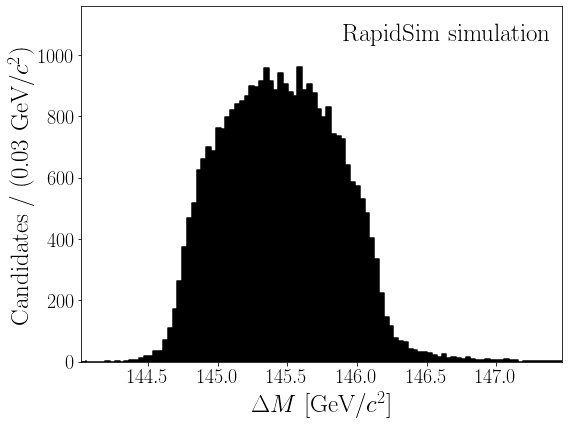

In [5]:
df['Delta_M'] =df['Dst_M']-df['D0_M']
print(len(df['Delta_M']))
print(len(df.query('Delta_M>143 and Delta_M<148')))

h.plot_hist({name_data:df}, 'Delta_M','$\Delta M$', 'GeV/$c^2$', n_bins = 100, name_folder = name_data, colors='black', mode_hist=True,
           pos_text_LHC={'ha':'right', 'text':pos_text})

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_KPiPi_constr/Dst_M_data_KPiPi_constr


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^*$) [MeV/$c^2$]', ylabel='Candidates / (2 MeV/$c^2$)'>)

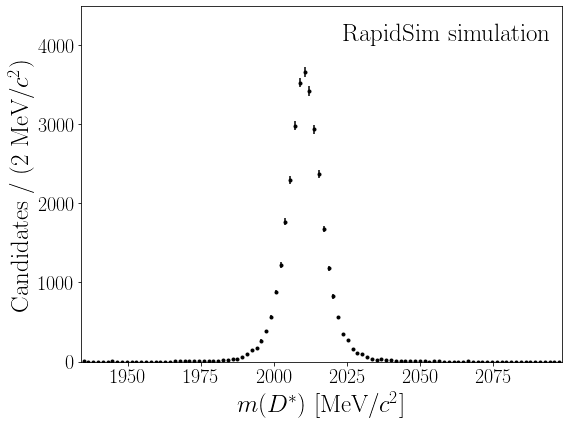

In [6]:
h.plot_hist_particle({name_data:df}, 'Dst_M', n_bins = 100, name_folder = name_data, colors='black', mode_hist=False,
           pos_text_LHC={'ha':'right', 'text':pos_text})

## Plot 1D histograms

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_KPiPi_constr/B0_M_Tau_Pi12pip_data_KPiPi_constr


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='m($D^{*}3\\pi$) [GeV/$c^2$]', ylabel='Candidates / (1e+01 GeV/$c^2$)'>)

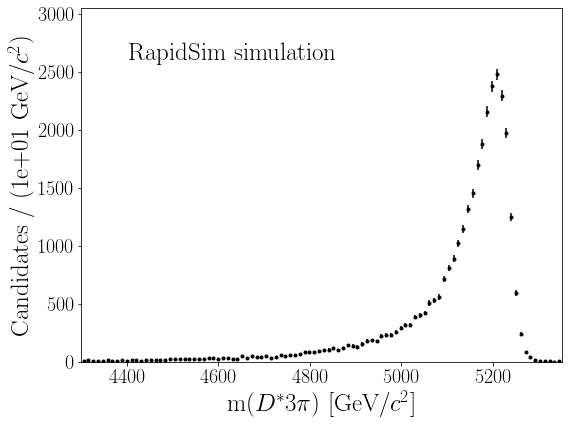

In [7]:
h.plot_hist_particle({name_data:df}, var, n_bins = 100, name_folder = name_data, colors='black', mode_hist=False,
                      low=low, high=high, pos_text_LHC={'x':0.1, 'y':0.90, 'ha':'left', 'text':pos_text})

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_KPiPi_constr/Dst_constr_B0_M_Tau_Pi12pip_data_KPiPi_constr


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='m($B^0|m(D_s)$=2010.26 MeV/$c^2$) [GeV/$c^2$]', ylabel='Candidates / (1e+01 GeV/$c^2$)'>)

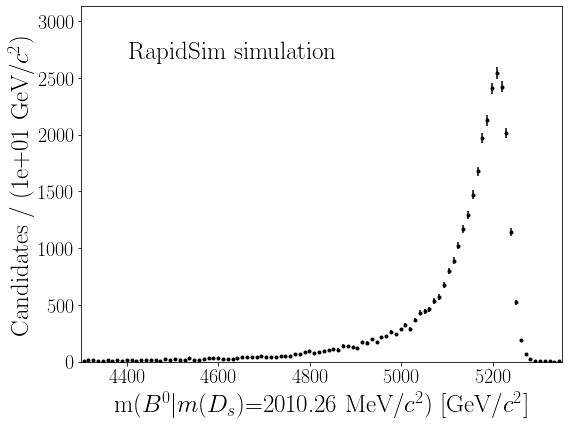

In [8]:
h.plot_hist_particle({name_data:df}, var_constr, n_bins = 100, name_folder = name_data, colors='black', 
                     mode_hist=False, low=low, high=high, pos_text_LHC={'x':0.1, 'y':0.90, 'ha':'left', 'text':pos_text})

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_KPiPi_constr/Kpipi_comparison_constrained


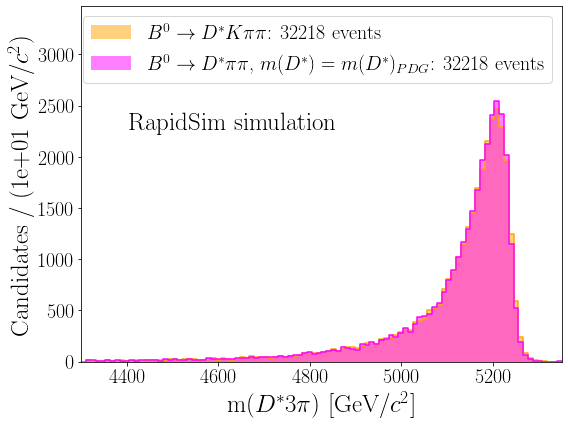

In [9]:
df_constr = pd.DataFrame()
df_constr[var] = df[var_constr]
fig, ax = h.plot_hist_particle({'$B^0\\to D^* K\pi\pi$':df, '$B^0\\to D^*\pi\pi$, $m(D^*)=m(D^*)_{PDG}$':df_constr}, var,
                     colors= ['orange', 'magenta'],
                     n_bins = 100, name_folder = name_data, name_file='Kpipi_comparison_constrained',
                     mode_hist=True, low=low, high=high, save_fig=True, density=False, 
                     pos_text_LHC={'x':0.1, 'y':0.70, 'ha':'left', 'text':pos_text})



## Two opposed Crystall ball Fit

In [10]:
obs = zfit.Space("x", limits=(low, high))

In [11]:
# fraction   0.8875     +/-   0.014       False
# alphaL     0.2414     +/-   0.014       False
# muL          5215     +/-    0.91       False
# nL          4.397     +/-    0.24       False
# sigmaL       19.2     +/-    0.61       False
# alphaR     -3.386     +/-    0.23       False
# muR          5183     +/-       3       False
# nR            0.1     +/-  0.0042       False
# sigmaR      39.41     +/-     1.5       False

muL = zfit.Parameter("muL", 5215, 5210, 5230)
muR = zfit.Parameter("muR", 5180, 5160, 5200)

sigmaL = zfit.Parameter("sigmaL", 20, 10., 50.)
sigmaR = zfit.Parameter("sigmaR", 40, 10., 50.)

alphaL = zfit.Parameter("alphaL", 0.3, 0.01, 2.)
alphaR = zfit.Parameter("alphaR", -1.8, -5., -0.1)

nL = zfit.Parameter("nL", 4.4, 0.1, 10.)
nR = zfit.Parameter("nR", 45., 0.000000000000000000000000000000000000000001, 60.)

frac = zfit.Parameter("fraction", 0.9, 0.1, 1.) # fraction between L and R

In [12]:
name_params = {
    'muL':'$\\mu_L$',
    'sigmaL':'$\\sigma_L$',
    'muR':'$\\mu_R$',
    'sigmaR':'$\\sigma_R$',
    'alphaL':'$\\alpha_L$',
    'alphaR':'$\\alpha_R$',
    'nL':'$n_L$',
    'nR':'$n_R$',
}

In [13]:
# doubleCB = zfit.pdf.DoubleCB(mu, sigma, alphaL, alphaR, nL, nR, obs=obs)

crystalBallL = zfit.pdf.CrystalBall(muL, sigmaL, alphaL, nL, obs=obs)
crystalBallR = zfit.pdf.CrystalBall(muR, sigmaR, alphaR, nR, obs=obs)
# gaussianR = zfit.pdf.Gauss(muR, sigmaR, obs=obs)

model = zfit.pdf.SumPDF([crystalBallL, crystalBallR], fracs=frac) # crystalBallR is multiplied by fracs

data = zfit.Data.from_pandas(df[var_constr],obs=obs)

In [14]:
result, params = launch_fit(model, data) # I performed 2 fits for the last fit to converge ...
result, params = launch_fit(model, data) 
result, params = launch_fit(model, data) 

------------------------------------------------------------------
| FCN = 1.887e+05               |     Ncalls=926 (926 total)     |
| EDM = 0.000523 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name          value    minuit_hesse    at limit
--------  ---------  --------------  ----------
fraction     0.8862     +/-   0.015       False
alphaL       0.2398     +/-   0.015       False
muL 

Info: VariableMetricBuilder: no improvement in line search
Info: VariableMetricBuilder: iterations finish without convergence.
Info in VariableMetricBuilder : edm = 0.975969
Info in             requested : edmval = 0.001
Info: VariableMetricBuilder: Tolerance is not sufficient, continue the minimization
Info in Current  Edm is : edm = 0.207643
Info in Required Edm is : edmval = 0.001


Number of d.o.f. in the model:  9
Reduced chi2:  1.446612220756656
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_KPiPi_constr_details/Dst_constr_B0_M_Tau_Pi12pip_data_KPiPi_constr_params_fit


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:xlabel='m($B^0|m(D_s)$=2010.26 MeV/$c^2$) [GeV/$c^2$]', ylabel='Candidates / (1e+01 GeV/$c^2$)'>,
 <AxesSubplot:xlabel='(reduced $\\chi^2$=1.45)', ylabel='residuals / $\\sigma$'>)

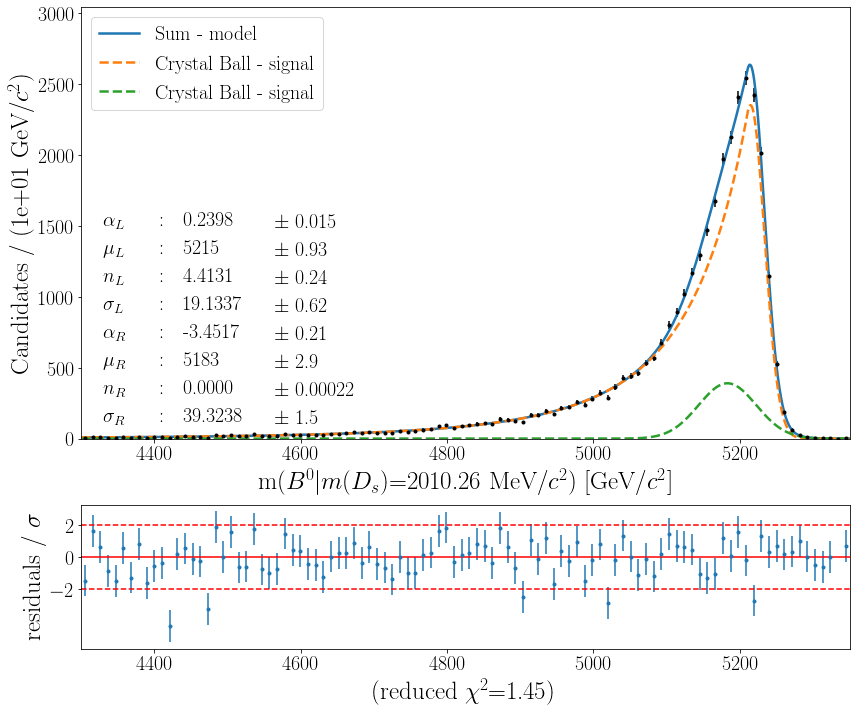

In [20]:
plot_hist_fit_particle(df, var_constr, models = [model, crystalBallL, crystalBallR], 
                       name_models=['','',''],
                       obs=obs, n_bins = 100,mode_hist = False,
                       name_folder = name_data+'_details', type_models= 'mss', loc_res='lower left',
                       name_data = name_data+'_params', params=params, name_params=name_params, show_chi2=True)   

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:511: UserWarning: The function <function Space.limits at 0x7f395f5d1560> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[4300.]]), array([[5350.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:34: UserWarning: The function <function Space.area at 0x7f395f5d7950> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[4300.]]), array([[5350.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins


Number of d.o.f. in the model:  9
Reduced chi2:  1.446612220756656
/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_KPiPi_constr/Dst_constr_B0_M_Tau_Pi12pip_data_KPiPi_constr_fit


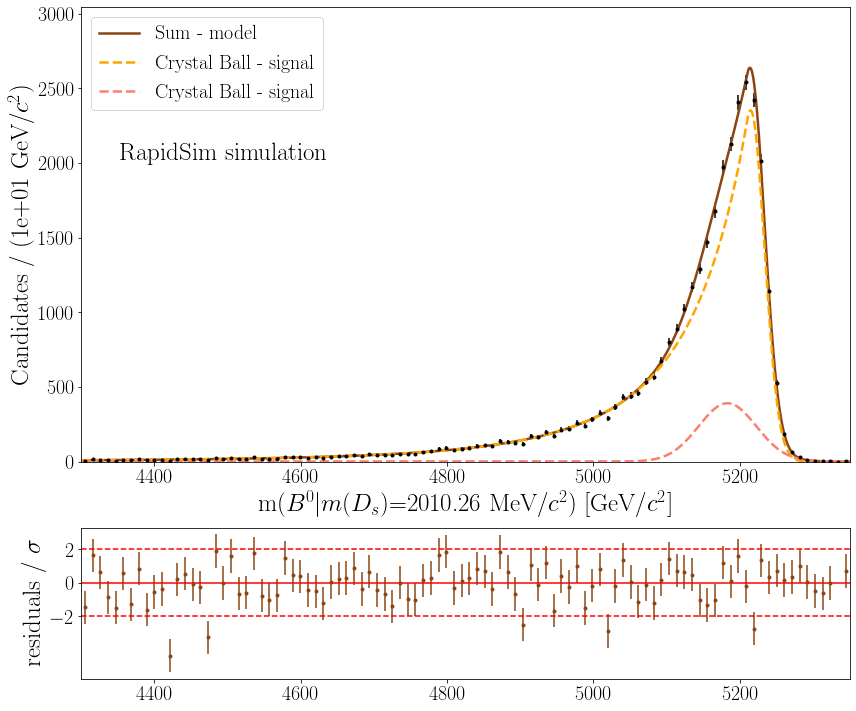

In [15]:
fig, ax, _ = plot_hist_fit_particle(df, var_constr, models = [model, crystalBallL, crystalBallR], 
                                    name_models=['','',''], colors=['saddlebrown', 'orange', 'salmon'],
                                    obs=obs, n_bins = 100,mode_hist = False,
                                    name_folder = name_data, type_models= 'mss', loc_res='lower left',
                                    name_data = name_data, 
                                    pos_text_LHC={'x':0.05, 'y':0.70, 'ha':'left', 'text':pos_text})   


In [11]:
save_params(params, name_data, True, name_folder='data_KPiPi')

parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/data_KPiPi/data_KPiPi_constr_params.json


In [3]:
json_to_latex_table(name_data, 'data_KPiPi', name_params_KPiPi)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/data_KPiPi/data_KPiPi_constr_params.tex
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/data_KPiPi/data_KPiPi_constr_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\alpha_L$&$0.240\pm0.015$\\
\hline
$\alpha_R$&$-3.45\pm0.21$\\
\hline
$f_{\frac{L}{R}}$&$0.886\pm0.015$\\
\hline
$\mu_L$&$5214.66\pm0.93$\\
\hline
$\mu_R$&$5183.1\pm2.9$\\
\hline
$n_L$&$4.41\pm0.24$\\
\hline
$n_R$&$0.00000\pm0.00022$\\
\hline
$\sigma_L$&$19.13\pm0.62$\\
\hline
$\sigma_R$&$39.3\pm1.5$\\
\hline
\end{tabular}


In [23]:
params = retrieve_params(name_data, 'data_KPiPi')

In [24]:
params

{'alphaL': 0.23984147888569726,
 'alphaL_err': 0.014606300049141147,
 'alphaR': -3.45169511727099,
 'alphaR_err': 0.2103605170057561,
 'fraction': 0.8861855867303668,
 'fraction_err': 0.014548498249207856,
 'muL': 5214.656416664541,
 'muL_err': 0.9298898776167499,
 'muR': 5183.074248990296,
 'muR_err': 2.8802055042528845,
 'nL': 4.413073505098077,
 'nL_err': 0.2403525875871481,
 'nR': 1.3686501931786665e-08,
 'nR_err': 0.00021714697051537863,
 'sigmaL': 19.133710600596434,
 'sigmaL_err': 0.6183387463611659,
 'sigmaR': 39.32384704379869,
 'sigmaR_err': 1.529343698500998}